# Fundamentos processamento de Imagens com Python

Este projeto demonstra diversas operações de processamento de imagens usando bibliotecas como NumPy, Pillow, Matplotlib, SciPy e OpenCV.


## Descrição

O código executa várias operações, incluindo:

- **Operações ponto a ponto**: Negativo, ajuste de intensidade, adição de quadrados pretos e brancos.
- **Operações por vizinhança**: Filtros de média e mediana manual e usando diferentes bibliotecas.
- **Transformações geométricas**: Escala, rotação e translação aplicadas às imagens.


## Código

**As operações implementadas sem a utilizções de funções prontas foram:**

- **OPERAÇÃO PONTO A PONTO**

  - Para o negativo é necessário apenas subtrir o valor maximo do pixel pelo seu valor atual
    ```python
    def negativo(npImg):
        return 255 - npImg
    ```

  - Para reduzir a intensidade de um imagem pela metade deve dividir o valor de cada pixel por dois
    ```python
    def intensidade(npImg):
      return npImg/2
    ```
  - Para desenhar um quadrado preto no centro da imagem é necessário encontrar o centro primeiro, o centro é a metade de seu tamanho em x e y, para desenhar o quadrado encontramos os pontos do canto do quadrado que é o centro menos a metade do tamanho do quadrado até o centro mais a metade do tamanho do quadrado, isso para x e y. Assim definindo esse intervalo com valor 0.
    ```python
    def qPreto(npImg, size):
      if(size%2 == 0):
        size -= 1
      half = int((size-1)/2)

      pix = 150

      if(pix%2 == 0):
        pix -= 1

      phalf = int((pix-1)/2)

      img = npImg.copy()

      img[half-phalf:half+phalf, half-phalf:half+phalf] = 0

      return img
    ```

  - Para desenhar um qudrado branco em cada borda da imagem é necessario saber os quatro cantos da imagem= 0,0 -> 0,size -> size,0 -> size,size e então encontrar o outro ponto para cada quadrado branco, sendo "branco" o tamanho do quadrado: 0+branco,0+branco -> 0+branco,size-branco -> size-branco,0+branco -> size-branco,size-branco. Com esses pontos é possivel desenhar os quadrados brancos nos quatro cantos da imagem.
    ```python
    def qBranco(npImg, size):
      pix = 100
      img = npImg.copy()
      img[0:pix, 0:pix] = 255
      img[size-pix:size, 0:pix] = 255
      img[0:pix, size-pix:size] = 255
      img[size-pix:size, size-pix:size] = 255
      return img
    ```

- **OPERAÇÃO POR VIZINHANÇA**

  - Para a media deve percorer a todos os pixels da imagem e calcular a media dos valores dos 8 pixels ao redor do pixel atual e do pixel atual, e atribuir o resultado no pixel da nova imagem.
    ```python
      def media(xo, yo, npImg):
        r = 3
        half = int((r-1)/2)
        res = npImg.copy()

        for x in range(1, xo-1):
          for y in range(1, yo-1):
            res[x,y] = int( np.sum(npImg[x-half:x+half+1,y-half:y+half+1]) / (r*r) )
        
        return res
    ```
  - Para a mediana é quase o mesmo processo que a media, porem ao inves de calular a media dos pixels deve ordernar os valores do pixel atual mais os valores dois 8 pixels ao redor e escolher o valor na metade da ordenação para ser o valor do novo pixel.
    ```python
      def mediana(xo, yo, npImg):
        r = 3
        half = int((r-1)/2)
        res = npImg.copy()
        phalf = int(((r*r)-1)/2)

        for x in range(1, xo-1):
          for y in range(1, yo-1):
            res[x,y] = np.sort(npImg[x-half:x+half+1,y-half:y+half+1], axis=None)[phalf]
        
        return res
    ```

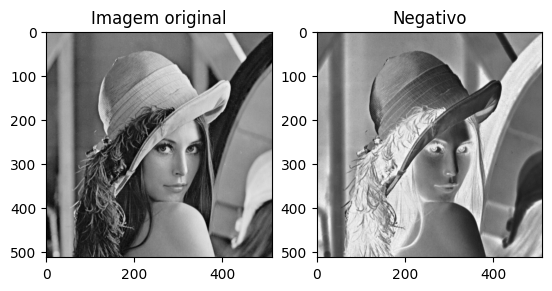

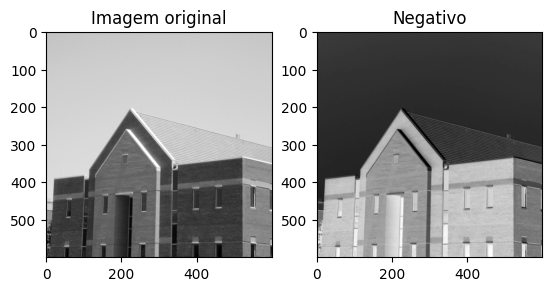

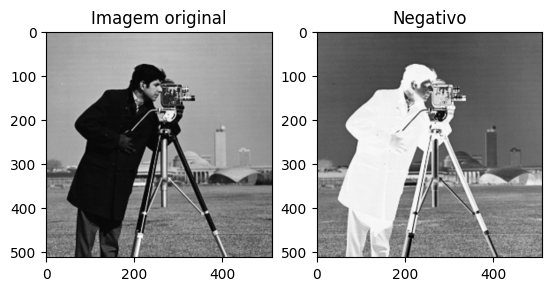

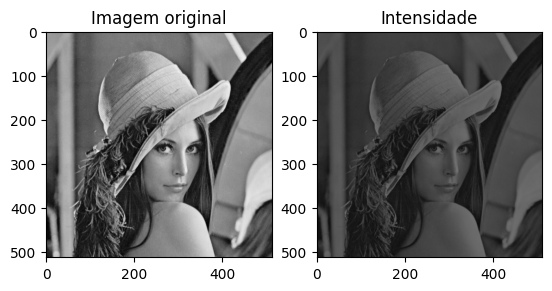

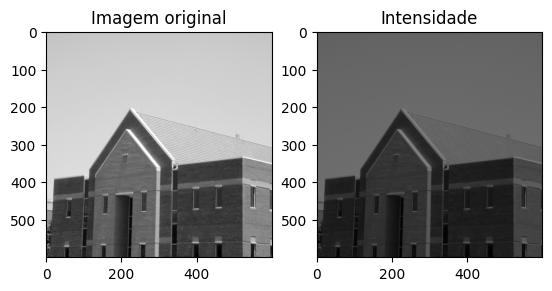

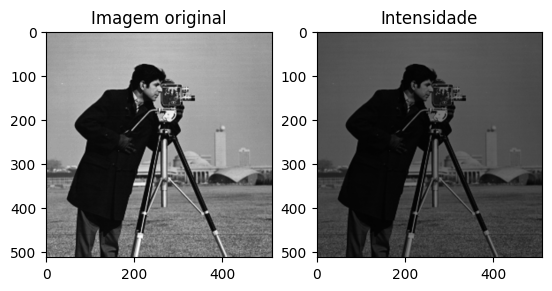

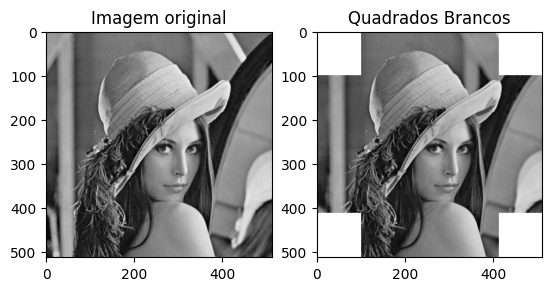

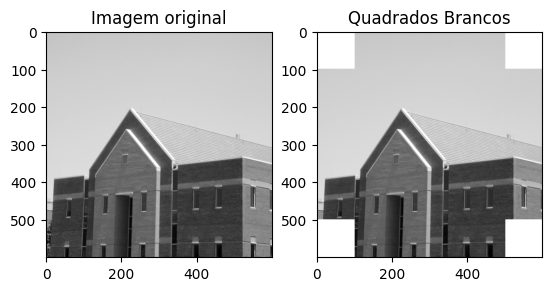

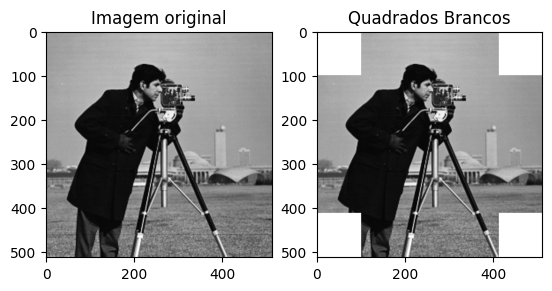

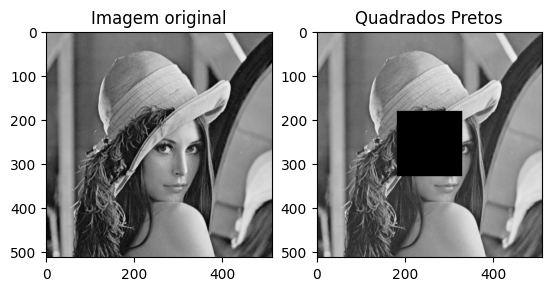

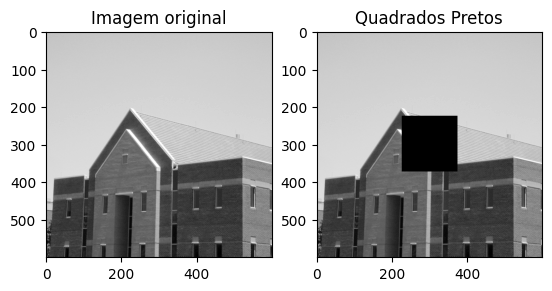

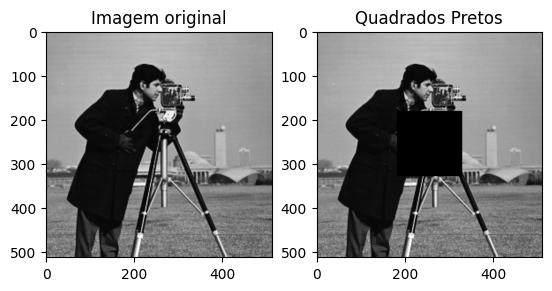

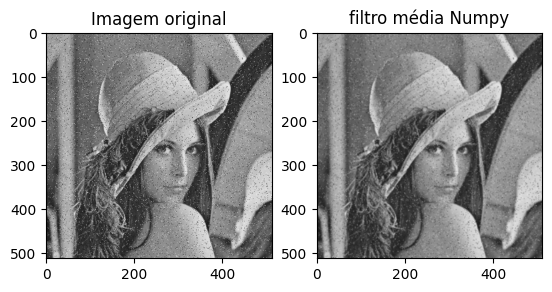

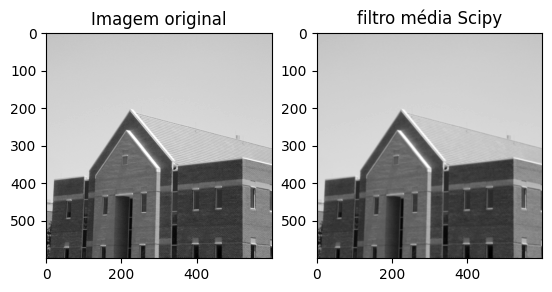

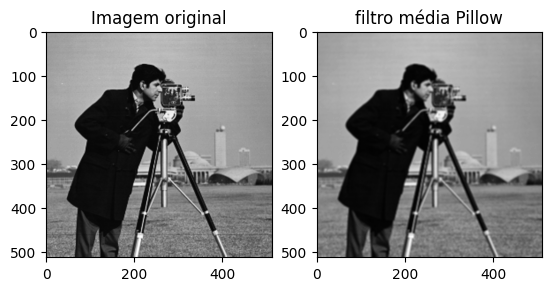

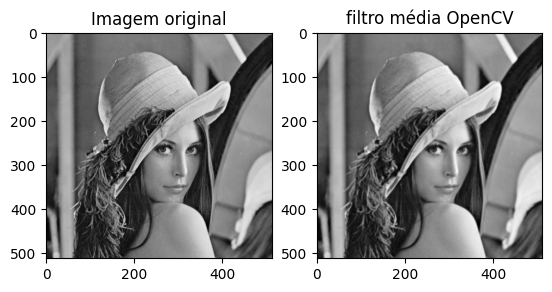

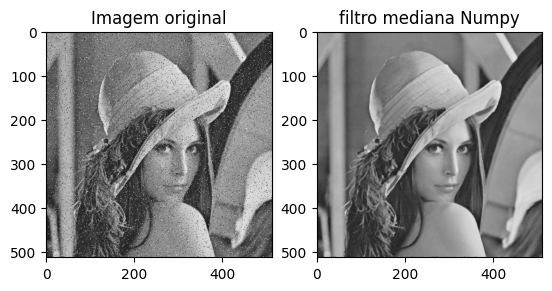

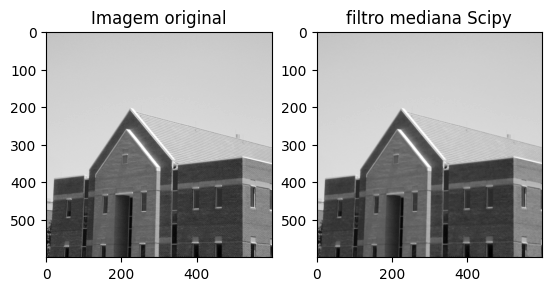

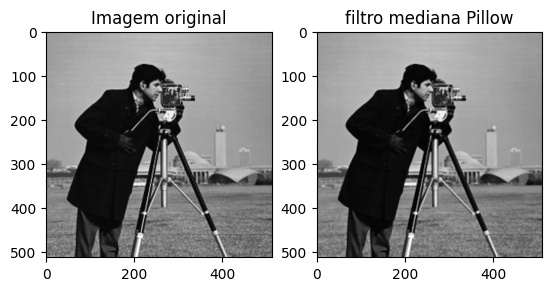

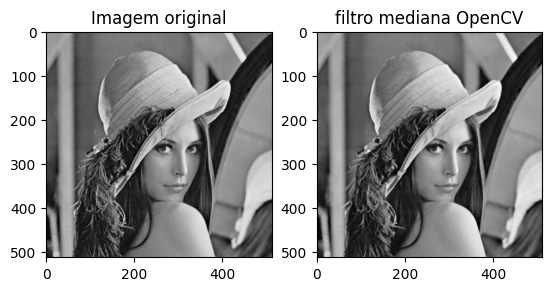

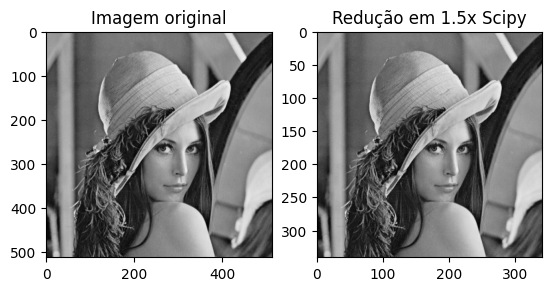

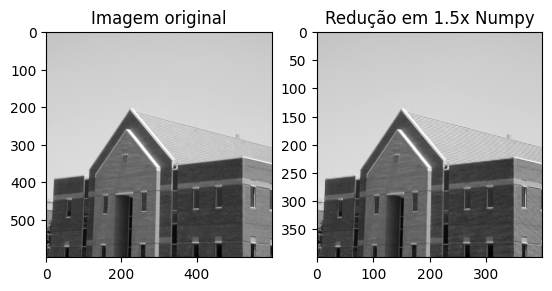

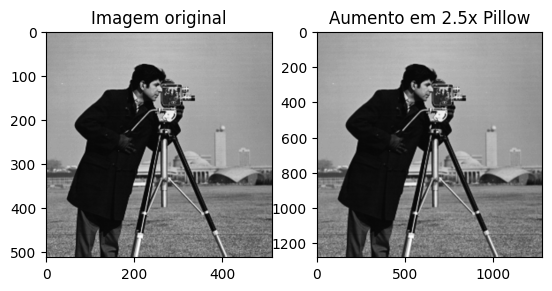

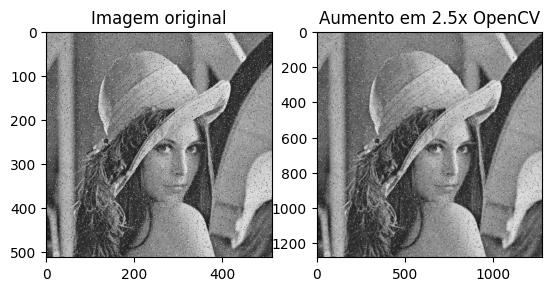

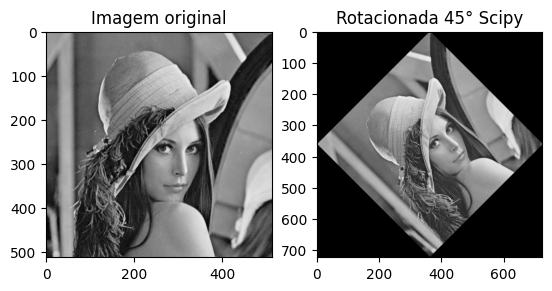

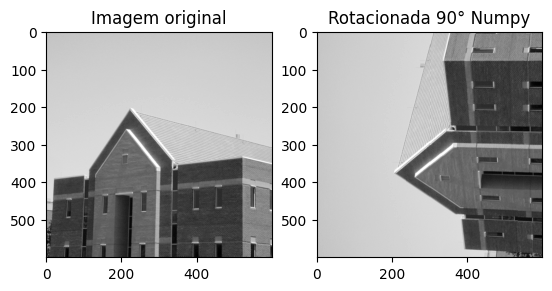

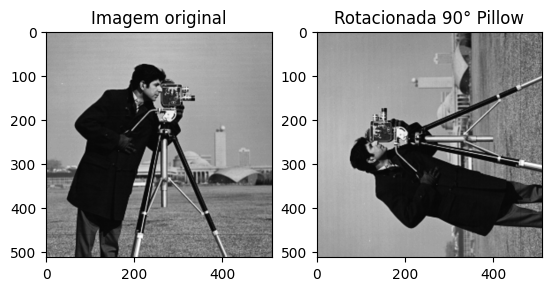

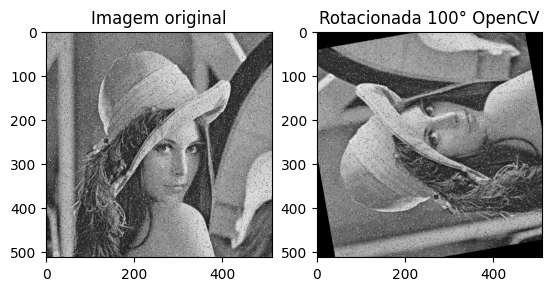

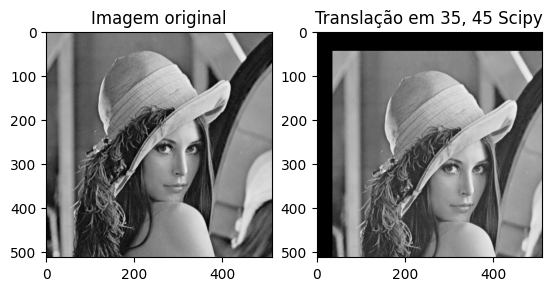

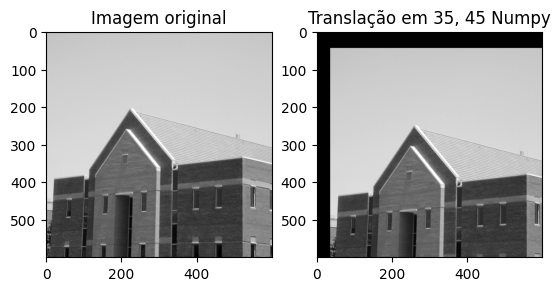

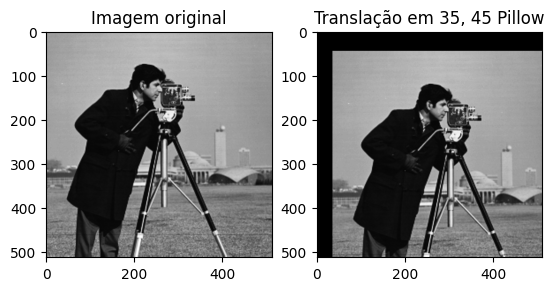

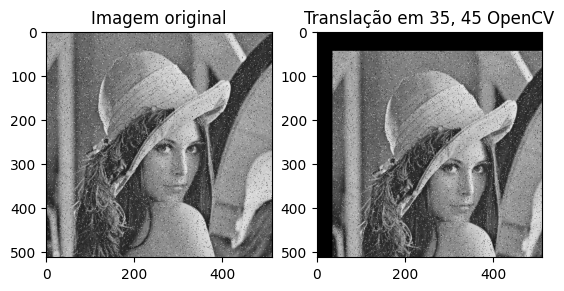

In [1]:
from os import O_EXCL
# Exemplo de leitura e plot de imagens
# Bibliotecas Numpy, Math, Pillow, Matplotlib, Scipy e OpenCV

import numpy as np
import math
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import scipy.ndimage
import cv2

# OPERAÇÃO PONTO A PONTO
def negativo(npImg):
    return 255 - npImg

def intensidade(npImg):
    return npImg/2

def qPreto(npImg, size):
    if(size%2 == 0):
      size -= 1
    half = int((size-1)/2)

    pix = 150

    if(pix%2 == 0):
      pix -= 1

    phalf = int((pix-1)/2)

    img = npImg.copy()

    img[half-phalf:half+phalf, half-phalf:half+phalf] = 0

    return img

def qBranco(npImg, size):
    pix = 100
    img = npImg.copy()
    img[0:pix, 0:pix] = 255
    img[size-pix:size, 0:pix] = 255
    img[0:pix, size-pix:size] = 255
    img[size-pix:size, size-pix:size] = 255
    return img

# OPERAÇÃO POR VIZINHANÇA

def mediaNumpy(xo, yo, npImg):
    r = 3
    half = int((r-1)/2)
    res = npImg.copy()

    for x in range(1, xo-1):
      for y in range(1, yo-1):
        res[x,y] = int( np.sum(npImg[x-half:x+half+1,y-half:y+half+1]) / (r*r) )

    return res

def mediaScipy(npImg):
    r = 3

    matriz = np.ones((r,r)) / (r*r)

    return scipy.ndimage.convolve(npImg, matriz, mode='reflect')

def mediaPillow(npImg):
    r = 3
    img = Image.fromarray(np.uint8(npImg))
    return np.array(img.filter(ImageFilter.BoxBlur(r-1)))

def mediaOpenCV(npImg):
    r = 3
    matriz = (r,r)
    return  cv2.blur(npImg, matriz)

def medianaNumpy(xo, yo, npImg):
    r = 3
    half = int((r-1)/2)
    res = npImg.copy()
    phalf = int(((r*r)-1)/2)

    for x in range(1, xo-1):
      for y in range(1, yo-1):
        res[x,y] = np.sort(npImg[x-half:x+half+1,y-half:y+half+1], axis=None)[phalf]

    return res

def medianaScipy(npImg):
    r = 3
    return scipy.ndimage.median_filter(npImg, size=r)

def medianaPillow(npImg):
    r = 3
    img = Image.fromarray(np.uint8(npImg))
    return np.array(img.filter(ImageFilter.MedianFilter(size=r)))

def medianaOpenCV(npImg):
    r = 3
    return cv2.medianBlur(npImg, r)

# TRANSFORMAÇÕES GEOMÉTRICAS

def escalaScipy(npImg, escala):
    return scipy.ndimage.zoom(npImg, escala)

def escalaNumpy(npImg, escala, x, y):
    newX = int(x*escala)
    newY = int(y*escala)
    img = np.zeros((newX, newY, 3), dtype=npImg.dtype)

    for i in range(newX):
      for j in range(newY):
          origX = int(i / escala)
          origY = int(j / escala)

          img[i, j] = npImg[origX, origY]

    return img

def escalaPillow(npImg, escala, x, y):
    img = Image.fromarray(np.uint8(npImg))

    newX = int(x*escala)
    newY = int(y*escala)

    nImg = img.resize((newX, newY), Image.BILINEAR)

    return np.array(nImg)

def escalaOpenCV(npImg, escala, x, y):
    newX = int(x*escala)
    newY = int(y*escala)

    return cv2.resize(npImg, (newX, newY), interpolation=cv2.INTER_LINEAR)

def rotacionarScipy(npImg, grau):
   return scipy.ndimage.rotate(npImg, grau, reshape=True)

def rotacionarNumpy(npImg, grau, x, y):

    rad = math.radians(-grau)

    cX, cY = x // 2, y // 2

    img = np.zeros_like(npImg)

    cosT = math.cos(rad)
    senT = math.sin(rad)

    for i in range(x):
      for j in range(y):
        nY = i - cY
        nX = j - cX

        oX = int(nX * cosT + nY * senT) + cX
        oY = int(-nX * senT + nY * cosT) + cY

        if 0 <= oX < x and 0 <= oY < y:
          img[i,j] = npImg[oY, oX]

    return img

def rotacionarPillow(npImg, grau):
    img = Image.fromarray(np.uint8(npImg))
    rImg = img.rotate(grau, expand=True)
    return np.array(rImg)

def rotacionarOpenCV(npImg, grau, x, y):
    centro = (x // 2, y // 2)

    matriz = cv2.getRotationMatrix2D(centro, grau, 1.0)

    return cv2.warpAffine(npImg, matriz, (x,y))

def translacaoScipy(npImg, dx, dy):
    return scipy.ndimage.shift(npImg, shift=(dy, dx), mode='constant', cval=0)

def translacaoNumpy(npImg, dx, dy, x, y):
    img = np.zeros_like(npImg)

    for i in range(x):
      for j in range(y):
        nX = i + dy
        nY = j + dx

        if 0 <= nX < x and 0 <= nY < y:
          img[nX,nY] = npImg[i,j]
    return img

def translacaoPillow(npImg, dx, dy):
    dx = -dx
    dy = -dy
    img = Image.fromarray(np.uint8(npImg))
    matrix = (1,0,dx,0,1,dy)
    return np.array(img.transform(img.size, Image.AFFINE, matrix))

def translacaoOpenCV(npImg, dx, dy, x, y):
    matriz = np.float32([[1,0,dx],[0,1,dy]])
    return cv2.warpAffine(npImg, matriz, (x, y))

def plot(img, edit, txt):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title("Imagem original")
    ax[1].imshow(edit, cmap='gray')
    ax[1].set_title(txt)
    plt.show()


def main():

    img1 = Image.open('imgs/lena_gray_512.tif')
    img2 = Image.open('imgs/house.tif')
    img3 = Image.open('imgs/cameraman.tif')
    img4 = Image.open('imgs/lena_gray_512_salt_pepper.tif')

    # converte imagens para numpy array
    npImg1 = np.array(img1)
    npImg2 = np.array(img2)
    npImg3 = np.array(img3)
    npImg4 = np.array(img4)

    # OPERAÇÃO PONTO A PONTO

    # Negativo
    plot(img1, Image.fromarray(negativo(npImg1)), "Negativo")
    plot(img2, Image.fromarray(negativo(npImg2)), "Negativo")
    plot(img3, Image.fromarray(negativo(npImg3)), "Negativo")

    # Intensidade
    plot(img1, Image.fromarray(intensidade(npImg1)), "Intensidade")
    plot(img2, Image.fromarray(intensidade(npImg2)), "Intensidade")
    plot(img3, Image.fromarray(intensidade(npImg3)), "Intensidade")

    # Quadrados Brancos
    plot(img1, Image.fromarray(qBranco(npImg1, img1.size[0])), "Quadrados Brancos")
    plot(img2, Image.fromarray(qBranco(npImg2, img2.size[0])), "Quadrados Brancos")
    plot(img3, Image.fromarray(qBranco(npImg3, img3.size[0])), "Quadrados Brancos")

    # Quadrados Pretos
    plot(img1, Image.fromarray(qPreto(npImg1, img1.size[0])), "Quadrados Pretos")
    plot(img2, Image.fromarray(qPreto(npImg2, img2.size[0])), "Quadrados Pretos")
    plot(img3, Image.fromarray(qPreto(npImg3, img3.size[0])), "Quadrados Pretos")

    # OPERAÇÃO POR VIZINHANÇA

    # filtro da média
    plot(img4, Image.fromarray(mediaNumpy(img4.size[0], img4.size[1], npImg4)), "filtro média Numpy")
    plot(img2, Image.fromarray(mediaScipy(npImg2)), "filtro média Scipy")
    plot(img3, Image.fromarray(mediaPillow(npImg3)), "filtro média Pillow")
    plot(img1, Image.fromarray(mediaOpenCV(npImg1)), "filtro média OpenCV")
    
    # filtro da mediana
    plot(img4, Image.fromarray(medianaNumpy(img4.size[0], img4.size[1], npImg4)), "filtro mediana Numpy")
    plot(img2, Image.fromarray(medianaScipy(npImg2)), "filtro mediana Scipy")
    plot(img3, Image.fromarray(medianaPillow(npImg3)), "filtro mediana Pillow")
    plot(img1, Image.fromarray(medianaOpenCV(npImg1)), "filtro mediana OpenCV")

    # TRANSFORMAÇÕES GEOMÉTRICAS

    # Escala Redução em 1.5x e aumentar em 2.5x
    plot(img1, Image.fromarray(escalaScipy(npImg1, (1/1.5))), "Redução em 1.5x Scipy")
    plot(img2, Image.fromarray(escalaNumpy(npImg2, (1/1.5), img2.size[0], img2.size[1])), "Redução em 1.5x Numpy")
    plot(img3, Image.fromarray(escalaPillow(npImg3, 2.5, img3.size[0], img3.size[1])), "Aumento em 2.5x Pillow")
    plot(img4, Image.fromarray(escalaOpenCV(npImg4, 2.5, img4.size[0], img4.size[1])), "Aumento em 2.5x OpenCV")

    # Rotação em 45º, 90º e 100º
    plot(img1, Image.fromarray(rotacionarScipy(npImg1, 45)), "Rotacionada 45° Scipy")
    plot(img2, Image.fromarray(rotacionarNumpy(npImg2, 90, img2.size[0], img2.size[1])), "Rotacionada 90° Numpy")
    plot(img3, Image.fromarray(rotacionarPillow(npImg3, 90)), "Rotacionada 90° Pillow")
    plot(img4, Image.fromarray(rotacionarOpenCV(npImg4, 100, img4.size[0], img4.size[1])), "Rotacionada 100° OpenCV")

    # Translação em 35 pixel no eixo X, 45 eixo Y
    plot(img1, Image.fromarray(translacaoScipy(npImg1, 35, 45)), "Translação em 35, 45 Scipy")
    plot(img2, Image.fromarray(translacaoNumpy(npImg2, 35, 45, img2.size[0], img2.size[1])), "Translação em 35, 45 Numpy")
    plot(img3, Image.fromarray(translacaoPillow(npImg3, 35, 45)), "Translação em 35, 45 Pillow")
    plot(img4, Image.fromarray(translacaoOpenCV(npImg4, 35, 45, img4.size[0], img4.size[1])), "Translação em 35, 45 OpenCV")


if __name__ == "__main__":
    main()